In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

## Load the clean trees data from saved pickle into the `trees` dataframe

In [3]:
# code here
trees=pd.read_pickle('../data/modified/trees_first_clean.pkl')

List first 5 elements of the dataframe

In [4]:
# code here
trees.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
0,32215,ESP32919,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Platanus,platanor,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190237,5.719919
1,32214,ESP32918,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Tilia,mongolica,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190280,5.719994
2,32213,ESP32917,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Malus,perpetu,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190322,5.720006
3,32212,ESP32916,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Platanus,platanor,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190359,5.719959
4,32211,ESP32915,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Tilia,mongolica,Arbre jeune,2014.0,Grenoble Alpes Métropole,45.190442,5.720047


List the columns of the dataframe

In [5]:
# code here
trees.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE',
       'LONGITUDE', 'LATITUDE'],
      dtype='object')

# Make train test split

#### Random split

Import `train_test_split` from scikit-learn.

In [6]:
# code here
from sklearn.model_selection import train_test_split as tts

In the following we want to build a machine learning model that helps us predict the plantation year for different trees based on their characteristics.

For this you have to first remove the column `ANNEEDEPLANTATION` from the dataframe and save the result in the variable `year`. Hint: use `pop`

In [7]:
# code here
year=trees.pop("ANNEEDEPLANTATION")
year

0        2014.0
1        2014.0
2        2014.0
3        2014.0
4        2014.0
          ...  
31948    1991.0
31949    1991.0
31950    1991.0
31951    1991.0
31952    1991.0
Name: ANNEEDEPLANTATION, Length: 31400, dtype: float64

Split the `trees` and the `year` data into train and test partitions. Use seed=800.

You must save the result in 4 variables: X_train (instances in the train set), X_test (instances in the test set), y_train (labels corresponding to the instances in the train set), y_test (labels corresponding to the instances in the test set).

For clarifications, read the `train_test_split` documentation.

In [8]:
# code here
X_train,X_test,Y_train,Y_test=tts(trees,year,random_state=800)

I need to be explained the pupose of spliting X and Y since they are randomly chosen onto the same index.
We can specify after whenever we want

Is that a speed efficiency reason ?

How many instanes are there in the train set?

In [9]:
# code here 31400-800

In [10]:
X_train.shape

(23550, 13)

How many instances are there in the test set?

In [11]:
# code here
X_test.shape

(7850, 13)

In [12]:
X_train.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'STADEDEDEVELOPPEMENT', 'COLLECTIVITE', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

# Basic stats

Display basic statistics on the train data (count, mean, std, etc.) - do it in one line! 

In [13]:
# code here
X_train.describe()

,ELEM_POINT_ID,ADR_SECTEUR,LONGITUDE,LATITUDE
count,23550.000000,23550.000000,23550.000000,23550.000000
mean,18363.025520,3.859830,45.176859,5.727327
std,11045.924091,1.697496,0.011904,0.012859
min,1.000000,1.000000,45.151572,5.697915
25%,8958.250000,2.000000,45.165925,5.717535
50%,17889.500000,4.000000,45.175541,5.729574
75%,27029.750000,5.000000,45.186669,5.737341
max,43041.000000,6.000000,45.224825,5.798704


Display basic statistics on the test data (count, mean, std, etc.) - do it in one line! 

In [14]:
# code here
X_train.describe()

,ELEM_POINT_ID,ADR_SECTEUR,LONGITUDE,LATITUDE
count,23550.000000,23550.000000,23550.000000,23550.000000
mean,18363.025520,3.859830,45.176859,5.727327
std,11045.924091,1.697496,0.011904,0.012859
min,1.000000,1.000000,45.151572,5.697915
25%,8958.250000,2.000000,45.165925,5.717535
50%,17889.500000,4.000000,45.175541,5.729574
75%,27029.750000,5.000000,45.186669,5.737341
max,43041.000000,6.000000,45.224825,5.798704


Display the distribution of the labels in the train set using a histogram with 50 bins. Do not call matplotlib explicitly.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232EC608EC8>,
      dtype=object)

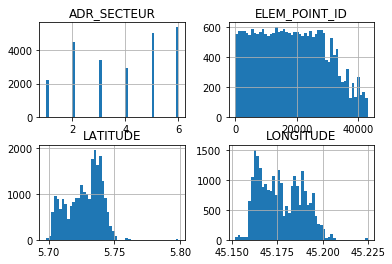

In [55]:
# code here
import seaborn as sns
#sns.countplot(X_train.SOUS_CATEGORIE)
#sns.countplot(X_train.CODE_PARENT)
X_train.hist(bins=50)

Display the distribution of the data in different columns of the train set using a histogram default number of bins. Do not call matplotlib explicitly and do it in one line!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232EACBBA88>,
      dtype=object)

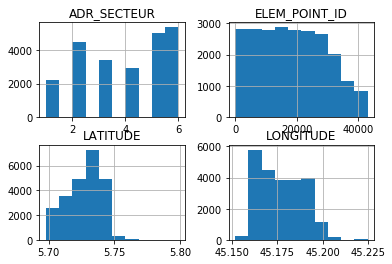

In [16]:
# code here
X_train.hist(bins=10)

Display the number of missing values for each column in the dataframe.

In [17]:
# code here
X_train.isnull().sum()

ELEM_POINT_ID              0
CODE                       0
SOUS_CATEGORIE             0
SOUS_CATEGORIE_DESC        0
CODE_PARENT                0
CODE_PARENT_DESC           0
ADR_SECTEUR                0
GENRE_BOTA                29
ESPECE                  1294
STADEDEDEVELOPPEMENT    1304
COLLECTIVITE               0
LONGITUDE                  0
LATITUDE                   0
dtype: int64

# Building a first naive model

We will consider we can determine the plantation year of trees in the test set based solely on the median value of the plantation year for the trees in the train set.

Display the median value of plantation year for trees in the train set.

In [18]:
# code here
m=Y_train.median()
m

1985.0

Display the shape of the test set.

In [19]:
# code here
X_test.shape

(7850, 13)

Create a variable `y_test_pred`. This will serve to store the predictions of your machine learning model on the test set.

It has to be an array of the same length as the number of test examples (in X_test).

Initialize this variable to have the median value from the train set.

In [20]:
# code here
y_test_pred=X_test.where(X_test==np.nan).fillna(m)


Display the contents of `y_test_pred`

In [21]:
# code here
y_test_pred.median()

ELEM_POINT_ID           1985.0
CODE                    1985.0
SOUS_CATEGORIE          1985.0
SOUS_CATEGORIE_DESC     1985.0
CODE_PARENT             1985.0
CODE_PARENT_DESC        1985.0
ADR_SECTEUR             1985.0
GENRE_BOTA              1985.0
ESPECE                  1985.0
STADEDEDEVELOPPEMENT    1985.0
COLLECTIVITE            1985.0
LONGITUDE               1985.0
LATITUDE                1985.0
dtype: float64

Import from the scikit-learn library the necessary function to compute the mean squared error.

In [22]:
# code here
import sklearn as sk


Apply the function to compute the error on the test set. Print the result.

In [23]:
# code here
sk.metrics.mean_squared_error(y_test_pred.iloc[:,0],Y_test)

310.200127388535

# Prepare data and build new models

### 1. Make a processing pipeline using only numerical data

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


Inspect the following code and write what it does the cell below.

In [25]:
from scipy.stats import zscore

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
    def fit_2(self,X,y=None):
        return zscore(self,ddof=1)

*Answer here*

Create un object, which doen't change through the method fit. 

But return a Dataframe reduced to some columns chosen.

The colone chosen depend of the name of the attributes given when creating the object

Define a `Pipeline` consisting of 3 steps: 
- selecting only the numerical attributes from the dataframe that could make sense for the prediction (longitude and latitude), 
- replacing missing values with the median of each column, 
- normalizing the data (removing the mean and scaling to unit variance).

For this, get help from the scikit learn documentation related to the corresponding functions.
Your code has to be one line!

In [56]:
num_attribs = ['LONGITUDE', 'LATITUDE']

# code here
from sklearn import pipeline as pi
num_pipeline = pi.make_pipeline(DataFrameSelector(num_attribs),SimpleImputer(strategy="median"),StandardScaler())

Inspect the longitude and latitude of the first elements in the train set.

In [60]:
# code here
num_pipeline.fit_transform(X_train)

array([[-0.50718517,  0.59001192],
       [-0.4972735 ,  0.98272516],
       [ 1.09862121,  0.96888736],
       ...,
       [ 0.7295437 ,  1.12437548],
       [ 1.43522577,  0.25513703],
       [-0.10783445, -0.76219774]])

Read the documentation for `fit_transform()` if you are unfamiliar with the method.

Apply the `fit_transform()` to the train data and save the result in `X_trainT`. Inspect its shape.

In [61]:
# code here
X_trainT=num_pipeline.fit_transform(X_train)
X_trainT.shape

(23550, 2)

Apply the `transform` to the test data. Save the result in a variable `X_testT` and print it.

In [62]:
# code here
num_pipeline.transform(X_test)

array([[ 0.01052574,  1.12904697],
       [-0.9080982 , -0.12805059],
       [ 0.00893492, -1.68527105],
       ...,
       [-1.18461785, -1.32366152],
       [ 1.56324796,  0.68994503],
       [-0.87258273, -1.28927307]])

What does the above output represent?

*answer here*

A biased result since the median was put before correction when taking train, which is part of our data

Repeat the above process by selectively commenting parts of the processing in the `Pipeline` and changing the missing values handling strategy. Observe the results and write down your observations below.

In [30]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return zscore(X[self.attribute_names],ddof=1)

    
num_pipeline2 = pi.make_pipeline(DataFrameSelector(num_attribs),SimpleImputer(strategy="median"))
num_pipeline2.fit(X_train).transform(X_train)

array([[-0.5071744 ,  0.58999939],
       [-0.49726294,  0.98270429],
       [ 1.09859788,  0.96886679],
       ...,
       [ 0.72952821,  1.12435161],
       [ 1.4351953 ,  0.25513162],
       [-0.10783216, -0.76218156]])

*answer here*

by letting the void value before scaling, we assume having a better approimation

What are `Pipeline`s useful for? Answer below.

*answer here*
They allow to simplify chain of operation on the same dataset.
Through classmethod, they allow a lot of things.

### 2. Start modelling!

Now we can start modelling. We will start with a Linear Regression model.

#### Linear Regression

Import from scikit learn what is necessary to 1)perform linear regression and to 2)compute the cross validation score (`cross_val_score`).


In [31]:
# code here
from sklearn import linear_model as lm
from sklearn.model_selection import cross_val_score as cvs

Inspect the documentation pages of the above two functions to understand their usage.

To better understand how cross validation works, read the documentation page from scikit learn `3.1. Cross-validation: evaluating estimator performance` up until Section `3.1.1`.

Create a linear regression instance and save it in the `lin_reg` variable below. Build a model on the training set, calling the `fit()` method.

In [32]:
lin_reg = lm.LinearRegression()
lin_reg.fit(X_trainT,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Run 10-fold cross validation with the metric to apply to the estimator (i.e. the scoring function) set to mean squared error.

Print the resulting scores of the cross validation and the descriptive statistics (mean, std, etc.)

In [77]:
# code here
a=cvs(lin_reg,num_pipeline2.fit(X_train).transform(X_train),Y_train,cv=10,scoring='neg_mean_squared_error')
print(np.sqrt(-a),"\nmean :",np.sqrt(-a).mean(),"\nstd :",np.sqrt(-a).std(),"\nmax :",np.sqrt(-a).max())

[16.75472311 16.7125099  16.74382214 17.0476053  16.68006313 16.61152094
 16.88315977 17.02302232 16.75895753 17.04188712] 
mean : 16.825727126229268 
std : 0.15307108550230486 
max : 17.047605296945644


#### Decision Trees

Import from scikit learn what is necessary to build a Decision Trees model for a regression problem.

In [34]:
# code here
from sklearn.tree import DecisionTreeRegressor

Create an instance of a `DecisionTreeRegressor` with `random_state=43` and save it in the `tree_reg` variable below. Leave all the other parameters to their default values. Build a model on the training set, calling the `fit()` method.

In [35]:
tree_reg = DecisionTreeRegressor(random_state=43)
tree_reg.fit(X_trainT,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=43, splitter='best')

Run 10-fold cross validation with the metric to apply to the estimator (i.e. the scoring function) set to mean squared error.

Print the resulting scores of the cross validation and the descriptive statistics (mean, std, etc.)

In [79]:
# code here
a=cvs(tree_reg,X_trainT,Y_train,cv=10,scoring='neg_mean_squared_error')
a
print(np.sqrt(-a),"\nmean :",np.sqrt(-a).mean(),"\nstd :",np.sqrt(-a).std(),"\nmax :",np.sqrt(-a).max())

[12.17483221 12.67688855 12.59915661 12.18778233 12.01927415 12.97972451
 12.61107339 12.58116325 12.96264026 13.11808609] 
mean : 12.591062134899333 
std : 0.3518005925664956 
max : 13.118086087163537


How are the results obtained using the `DecisionTreeRegressor` in comparison to the results obtained using `LinearRegression` and in comparison to the Naive Model from the beginning of this notebook? 

Write down below the mean squared error value for each of them and your conclusions.

*answer here*

Better result, points are closer to the mean.

Naive<LinearRegression<Cross_valdation

315 > 280 > 150

### 3. Alter the hyper-parameters of the model

Previously you called the `DecisionTreeRegressor`function with default parameters.

In the following we will explore running different Decision Tree models with different parameters.

To begin with, inspect the scikit learn page of `DecisionTreeRegressor` to understand which are the possible different hyper-parameters that you can adjust. Call a function to get the parameters of the `DecisionTreeRegressor`, save the result in a variable and display its contents below.


In [81]:
# code here

tree_reg = DecisionTreeRegressor(random_state=43,min_samples_split=3)
tree_reg.fit(X_trainT,Y_train)
a=cvs(tree_reg,X_trainT,Y_train,cv=10,scoring='neg_mean_squared_error')
a
print(np.sqrt(-a),"\nmean :",np.sqrt(-a).mean(),"\nstd :",np.sqrt(-a).std(),"\nmax :",np.sqrt(-a).max())

[12.17483221 12.67688855 12.59915661 12.18778233 12.01927415 12.97972451
 12.61107339 12.58116325 12.96264026 13.11808609] 
mean : 12.591062134899333 
std : 0.3518005925664956 
max : 13.118086087163537


Create 10 new instances of a `DecisionTreeRegressor` and save them in 10 different variables, while keeping `random_state=43`. 

For each of them alter the default parameters by inputing different values for each of the following: `min_impurity_decrease`,  `max_depth`, `max_features`. Then, for each of them build a model on the training set, calling the `fit()` method.


In [78]:
# code here
L=["L{}".format(i) for i in range(10)]
n=10
D={}
print("\n### max depth variable ####\n")    
for i in range(5):
    D[L[i]]=DecisionTreeRegressor(random_state=43,max_depth=10-i).fit(X_trainT,Y_train)
    a=cvs(D[L[i]],X_trainT,Y_train,cv=10,scoring='neg_mean_squared_error')
    print(np.sqrt(-a),"\nmean :",np.sqrt(-a).mean(),"\nstd :",np.sqrt(-a).std(),"\nmax :",np.sqrt(-a).max(),"\ni=",i)
print("\n### max features vairable ####\n")    
for i in range(5,10)    :
    D[L[i]]=DecisionTreeRegressor(random_state=43,max_features=1/(i-4),max_depth=10).fit(X_trainT,Y_train)
    a=cvs(D[L[i]],X_trainT,Y_train,cv=10,scoring='neg_mean_squared_error')
    print(np.sqrt(-a),"\nmean :",np.sqrt(-a).mean(),"\nstd :",np.sqrt(-a).std(),"\nmax :",np.sqrt(-a).max(),"\ni=",i)


### max depth variable ####

[13.02681983 13.42661367 13.32537491 13.24921296 12.82112129 13.00684022
 12.92303113 12.89623562 13.14166571 13.27869183] 
mean : 13.109560715754435 
std : 0.19419909923539144 
max : 13.42661367081717 
i= 0
[13.39803456 13.73543313 13.67734621 13.72627733 13.27565682 13.72719194
 13.37950619 13.49344174 13.57596574 13.69399652] 
mean : 13.568285017236457 
std : 0.16179111033859142 
max : 13.735433131319912 
i= 1
[13.73824579 14.28473929 14.0632778  14.14591914 13.81239496 14.15172835
 13.81493224 14.22204641 14.03444809 14.24520161] 
mean : 14.051293368786741 
std : 0.18752611498360822 
max : 14.284739291145463 
i= 2
[14.25914557 14.52048809 14.65867874 14.64215203 14.29572004 14.32745899
 14.40212004 14.79743497 14.5770477  14.79879463] 
mean : 14.527904080387788 
std : 0.18994570775789124 
max : 14.798794632883162 
i= 3
[14.80176793 14.89526654 14.92865366 14.93300267 14.78478329 14.67140185
 14.81258348 15.23547724 14.8542113  15.2033734 ] 
mean : 14.9

Run 10-fold cross validation with the metric to apply to the estimator (i.e. the scoring function) set to mean squared error.

Print the resulting scores of the cross validation and the descriptive statistics (mean, std, etc.) for all 10 models.


# code here


How is the performance different for different models? Answer below.

*Answer here*
lowering the depth naturally lower generalisation, so give worse approximation, but is better to predict

max features doesn't change by much the quality of approximation for our model.
It will for a fractal curve.

### 4. Evaluate the models on the test set

Until now you have only investigated the performance (in terms of mean squared error) of the models on the train set. However, in practice we are interested to know how well a model generalizes on unseen data.

Evaluate each of the above models on the test set. Record below the following: 
* model name & parameters
* model score on the train set
* model score on the test set

Rememeber: you had to apply the exact same pre-processing steps for the train and test set: you did this in Section `Make a processing pipeline using only numerical data` and saved the results in `X_trainT` and `X_testT`.

In [82]:
# code here
num_pipeline = pi.make_pipeline(DataFrameSelector(num_attribs),SimpleImputer(strategy="median"),StandardScaler())
X_testT=num_pipeline.fit(X_test).transform(X_test)
for i in range(10):
    print("i:",i,": ",np.sqrt(sk.metrics.mean_squared_error(D[L[i]].predict(X_testT),Y_test)))
    

i: 0 :  14.010820859596782
i: 1 :  14.164390365084705
i: 2 :  14.40169280979942
i: 3 :  14.721593586927916
i: 4 :  15.000638299678046
i: 5 :  14.010820859596782
i: 6 :  14.6336929038713
i: 7 :  14.6336929038713
i: 8 :  14.6336929038713
i: 9 :  14.6336929038713


*Answer here*

In [83]:
np.sqrt(sk.metrics.mean_squared_error(D[L[0]].predict(X_testT),Y_test))


14.010820859596782

How do the models compare to each other? Can you observe any overfitting? For which model? Answer below.

*Answer here*

No weirdly enough I see no difference

Linear regression was bad in first place

### 5. Grid search for the best parameters

Previously, you tried several models with different values for different hyper-parameters, by choosing these values manually and evaluating each model individually. However, doing so exhaustically is impossible in practice in a given limited amount of time. 

In the following you will see how you can speed up the process and use a grid search over a set of parameters to find the best ones that fit the train data.

For this, read the documentation for the `GridSearchCV` function in scikit learn. Make the necessary import below.

In [41]:
# code here
from sklearn import model_selection as ms


In [42]:

tree_reg.get_params()#.keys()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 43,
 'splitter': 'best'}

Read from scikit learn the documentation page `3.2. Tuning the hyper-parameters of an estimator` to understand the usage of `GridSearchCV`.

Apply a grid search strategy with 10-fold cross validation to select the best parameters for fitting the train set using a `DecisionTreeRegressor`. Use the `r2` scoring function. Make sure your grid search is done over at least 200 models (it will take a bit of time, it's normal). HINT: you can use ranges of values for setting certain hyper-parameters, instead of defining them manually.


In [43]:
# code here
M=ms.GridSearchCV(DecisionTreeRegressor(),  {'min_impurity_decrease':[0.1,0.2,0.3,0.4,0.5,0.6],'max_depth': [i for i in range(1,10)], 'min_samples_leaf': [2,4,6,8]},scoring='r2',cv=10)
M


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6],
           

Evaluate the obtained model on both the train set and the test set. NOTE: do not forget to use the transformed version of these sets obtained after having applied the processing pipeline.

In [85]:
# code here
A=M.fit(X_trainT,Y_train).predict(X_testT)
print(np.sqrt(sk.metrics.mean_squared_error(A,Y_test)),"\n suite",np.sqrt(sk.metrics.mean_squared_error(A,Y_train)))

ValueError: Found input variables with inconsistent numbers of samples: [7850, 23550]

How is the performance of the new model compared to all previous performances? Answer below.

*Answer here*

Write code to print the best values for each the parameters on which you did the grid search.

In [45]:
# code here
M.fit(X_trainT,Y_train).best_score_

0.3572576911979227

### Congratulations! You are now able to run a full machine learning pipeline from data preprocessing to model building and evaluation. Now it is time to repeat the process with different / more features.

## Next steps

1. Repeat the above process to create a pipeline only for categorical variables.
2. Build models with the resulting transformed data.
3. Compare the performance of the new models to the previous ones built on top of only numerical variables.

4. Is it worth combining both catagorical and numerical variables? If so, try to combine both pipelines, build new models and compare the performance to the previous models.

For each of the above points:
* write the code needed to solve the task;
* run the code and print the results;
* write an explanation of what you did in a markdown cell below the code.

Add as many cells below as necessary to solve all the required points.

In [46]:
# code here
categoricaldata=["CODE","SOUS_CATEGORIE","CODE_PARENT","CODE_PARENT_DESC","GENRE_BOTA","ESPECE","STADEDEDEVELOPPEMENT","COLLECTIVITE"]
X_train.dtypes

ELEM_POINT_ID             int64
CODE                     object
SOUS_CATEGORIE           object
SOUS_CATEGORIE_DESC      object
CODE_PARENT              object
CODE_PARENT_DESC         object
ADR_SECTEUR               int64
GENRE_BOTA               object
ESPECE                   object
STADEDEDEVELOPPEMENT     object
COLLECTIVITE             object
LONGITUDE               float64
LATITUDE                float64
dtype: object

In [47]:
from sklearn import preprocessing as pp
from sklearn import impute

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

*Answer here*

In [48]:
ord_encoder=pp.OrdinalEncoder()
Data_selector=DataFrameSelector(categoricaldata)
pip=pi.make_pipeline(Data_selector,impute.SimpleImputer(strategy='constant',fill_value='lacking data'),ord_encoder)
pip.fit(trees)
X_trainC=pip.transform(X_train)
X_testC=pip.transform(X_test)

First I created a selection for categorical data

Second I use a simple imputer to fill Na value specifiying the lack of data

Third i use an encoder technique in order to compare numerical things through discrete approach


In [49]:
M.fit(X_trainC,Y_train).best_score_

0.6605999506740573

In [50]:
prediction=M.predict(X_testC)

In [51]:
sk.metrics.r2_score(prediction,Y_test)

0.5384290951743147

categorical data seems to have a better way to predict. while the other one may have no to few link.

R2 score <50% means there is less than 50% that follow the model.

Which means that the value might not have a great correlation ( at least, outside of the train sample), therefore it

might be a bad choice to include numerical data

we need to try to know


In [52]:
F1=np.hstack((X_trainC,X_trainT))
F2=np.hstack((X_testC,X_testT))
M.fit(F1,Y_train).best_score_

0.7417489619006079

In [53]:
sk.metrics.r2_score(M.predict(F2),Y_test)

0.6523086695785016

better aproximation through combinaison of categorical plus numerical data

Which I don't find obvious, but kinda is